### Import core libraries

In [105]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

### Import data

In [106]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

### Data cleanning

In [107]:
df.drop_duplicates(inplace=True)
df.dropna(subset=['Price'], inplace = True) #Remove all rows without label
df.count()

Suburb           27247
Address          27247
Rooms            27247
Type             27247
Price            27247
Method           27247
SellerG          27247
Date             27247
Distance         27246
Postcode         27246
Bedroom2         20806
Bathroom         20800
Car              20423
Landsize         17982
BuildingArea     10656
YearBuilt        12084
CouncilArea      27244
Lattitude        20993
Longtitude       20993
Regionname       27244
Propertycount    27244
dtype: int64

In [108]:
df.drop(['Lattitude', 'Longtitude', 'SellerG', 'Address', 'BuildingArea', 'YearBuilt', 'Postcode', 'CouncilArea', 'Suburb', 'Propertycount'], axis=1, inplace=True)
df.count()

Rooms         27247
Type          27247
Price         27247
Method        27247
Date          27247
Distance      27246
Bedroom2      20806
Bathroom      20800
Car           20423
Landsize      17982
Regionname    27244
dtype: int64

In [115]:
df.dropna(inplace=True)
df['Month'] = pd.to_datetime(df['Date']).dt.month.astype('category')
df.head()

,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Regionname,Month
1,2,h,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,Northern Metropolitan,3
2,2,h,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,Northern Metropolitan,4
4,3,h,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,Northern Metropolitan,4
5,3,h,850000.0,PI,4/03/2017,2.5,3.0,2.0,1.0,94.0,Northern Metropolitan,4
6,4,h,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2.0,120.0,Northern Metropolitan,4


In [116]:
df.dtypes

Rooms            int64
Type            object
Price          float64
Method          object
Date            object
Distance       float64
Bedroom2       float64
Bathroom       float64
Car            float64
Landsize       float64
Regionname      object
Month         category
dtype: object

In [117]:
#Check Correlation
df.corr()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize
Rooms,1.000000,0.452257,0.286064,0.952508,0.602074,0.390175,0.034105
Price,0.452257,1.000000,-0.219402,0.435453,0.437154,0.201734,0.032911
Distance,0.286064,-0.219402,1.000000,0.289082,0.135031,0.252550,0.055373
Bedroom2,0.952508,0.435453,0.289082,1.000000,0.598919,0.392118,0.034030
Bathroom,0.602074,0.437154,0.135031,0.598919,1.000000,0.301769,0.037541
Car,0.390175,0.201734,0.252550,0.392118,0.301769,1.000000,0.031301
Landsize,0.034105,0.032911,0.055373,0.034030,0.037541,0.031301,1.000000


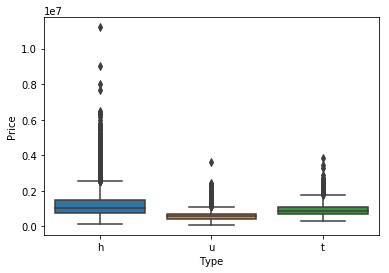

In [41]:
#Check overlap of Categorical variables using boxplot
sns.boxplot(x='Type', y='Price', data=df) #x is feature, y is target

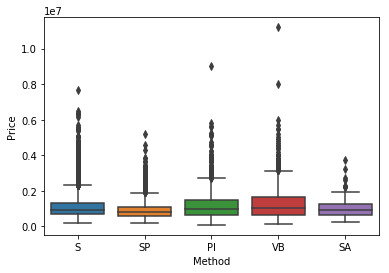

In [42]:
sns.boxplot(x='Method', y='Price', data=df) #x is feature, y is target

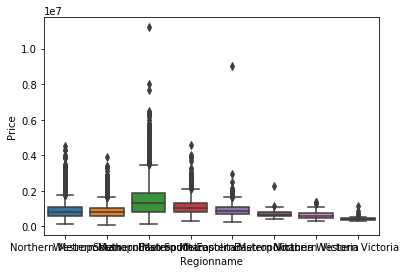

In [43]:
sns.boxplot(x='Regionname', y='Price', data=df) #x is feature, y is target

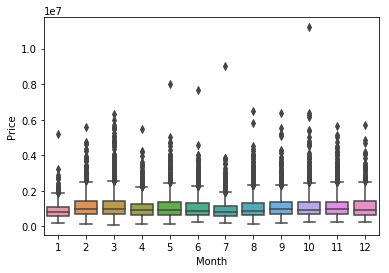

In [118]:
sns.boxplot(x='Month', y='Price', data=df) #x is feature, y is target

### Model evaluation

In [122]:
from sklearn.linear_model import LinearRegression

X_data = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Month']]
y_data = df['Price']

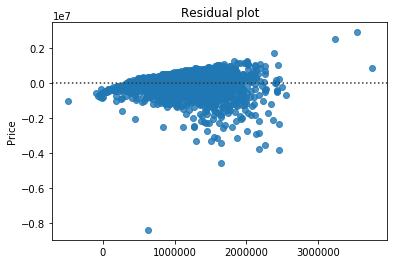

In [123]:
#Holdout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
prediction = model.predict(X_test)

#Residual plot
plt.title('Residual plot')
plt.ylabel('Residual')
sns.residplot(prediction, prediction - y_test)

In [121]:
# Cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score

model = LinearRegression()
y_pred = cross_val_predict(model, X_data, y_data, cv=5)
scores = cross_val_score(model, X_data, y_data, cv=5)
print(scores.mean())

0.3621405051117543


### PCA

In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler